<a href="https://colab.research.google.com/github/2303A52158/AIML_2303A52158/blob/main/2303A52158_Q8_B34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = '/content/student-por.csv'
data = pd.read_csv(file_path, delimiter=';')

# Define low performance: students with final grade (G3) less than 10 are considered low performers
data['Low_Performance'] = (data['G3'] < 10).astype(int)

# Select features and target variable
features = data.drop(['G3', 'Low_Performance'], axis=1)
target = data['Low_Performance']

# Convert categorical variables to dummy/indicator variables
features = pd.get_dummies(features, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier to identify feature importance
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Get top 5 reasons
top_5_reasons = feature_importances.head(5)
print("Top 5 Reasons for Low Performance:")
print(top_5_reasons)


Top 5 Reasons for Low Performance:
      Feature  Importance
14         G2    0.267740
13         G1    0.212598
5    failures    0.051458
15  school_MS    0.034056
12   absences    0.031345


In [12]:
# Count students with both parents employed
both_employed_count = data[
    (data['Mjob'] != 'at_home') & (data['Fjob'] != 'at_home')
].shape[0]

print(f"Number of students with both parents employed: {both_employed_count}")


Number of students with both parents employed: 490


In [13]:
# Count students with both parents employed
both_employed_count = data[
    (data['Mjob'] != 'at_home') & (data['Fjob'] != 'at_home')
].shape[0]

print(f"Number of students with both parents employed: {both_employed_count}")


Number of students with both parents employed: 490


In [14]:
# Find the maximum and minimum age of students
max_age = data['age'].max()
min_age = data['age'].min()

print(f"The maximum age is: {max_age}")
print(f"The minimum age is: {min_age}")


The maximum age is: 22
The minimum age is: 15


In [15]:
# Find the most common medium of instruction
most_used_medium = data['school'].value_counts().idxmax()
most_used_medium_count = data['school'].value_counts().max()

print(f"The most used medium of instruction is: {most_used_medium}")
print(f"Number of students in this medium: {most_used_medium_count}")


The most used medium of instruction is: GP
Number of students in this medium: 423


Mean grade with extracurricular activities: 12.10
Mean grade without extracurricular activities: 11.72
T-statistic: 1.52, P-value: 0.1280


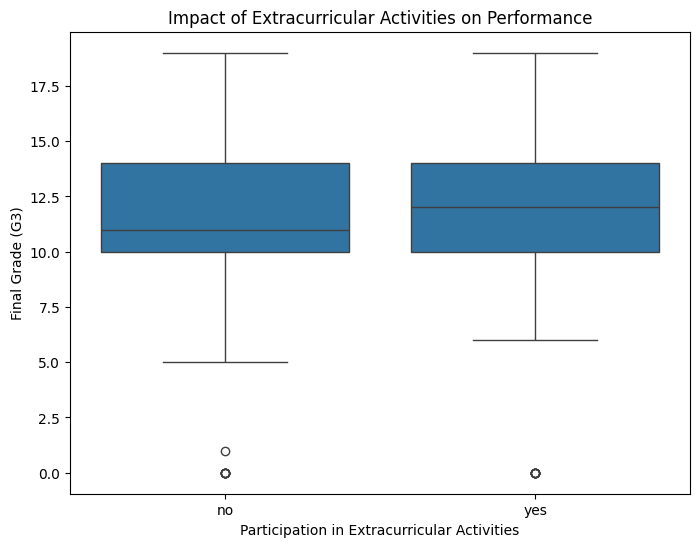

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Group data by extracurricular activity participation
group_yes = data[data['activities'] == 'yes']['G3']
group_no = data[data['activities'] == 'no']['G3']

# Calculate mean grades for each group
mean_yes = group_yes.mean()
mean_no = group_no.mean()

# Perform a t-test to assess significance
t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)

print(f"Mean grade with extracurricular activities: {mean_yes:.2f}")
print(f"Mean grade without extracurricular activities: {mean_no:.2f}")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Visualize the differences
plt.figure(figsize=(8, 6))
sns.boxplot(x='activities', y='G3', data=data)
plt.title('Impact of Extracurricular Activities on Performance')
plt.xlabel('Participation in Extracurricular Activities')
plt.ylabel('Final Grade (G3)')
plt.show()


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       115
           1       0.77      0.67      0.71        15

    accuracy                           0.94       130
   macro avg       0.86      0.82      0.84       130
weighted avg       0.94      0.94      0.94       130



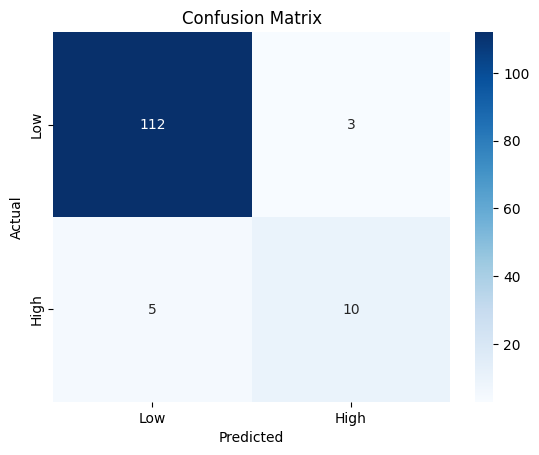

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define low performance: students with final grade (G3) less than 10 are considered low performers
data['Low_Performance'] = (data['G3'] < 10).astype(int)

# Features and target variable
features = data.drop(['G3', 'Low_Performance'], axis=1)
target = data['Low_Performance']

# One-hot encode categorical variables
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
